## Bayesian Analysis of 2020 Bundesliga Results

In [1]:
library("rstan")
library("parallel")

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [2]:
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

In [3]:
getwd()

[1] "/mnt/d/Github/Stan/Stan/Jupyter"

In [4]:
setwd("/mnt/d/Dropbox/Dropbox/Stan")
remove(list = ls()) # clear the current work space

In [5]:
HFA <- readRDS(file = paste(getwd(),
    "/Data/Sorted_Bundesliga_2019_20.rds", sep = ""))

In [6]:
HFA

Season,Week,Date,Day,Host,Visitor,HG,VG,COVID,host,visitor,gdate,hgp,vgp
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<date>,<int>,<int>
2019-20,1,8/16/2019,Fri,MUN,BSC,2,2,0,14,3,2019-08-16,1,1
2019-20,1,8/17/2019,Sat,DOR,AUG,5,1,0,4,1,2019-08-17,1,1
2019-20,1,8/17/2019,Sat,LEV,PAD,3,2,0,11,15,2019-08-17,1,1
2019-20,1,8/17/2019,Sat,WOL,KOL,2,1,0,18,9,2019-08-17,1,1
2019-20,1,8/17/2019,Sat,BRE,DUS,1,3,0,2,5,2019-08-17,1,1
2019-20,1,8/17/2019,Sat,FRE,MAI,3,0,0,7,12,2019-08-17,1,1
2019-20,1,8/17/2019,Sat,MON,SCH,0,0,0,13,16,2019-08-17,1,1
2019-20,1,8/18/2019,Sun,FRA,HOF,1,0,0,6,8,2019-08-18,1,1
2019-20,1,8/18/2019,Sun,UNB,LEI,0,4,0,17,10,2019-08-18,1,1


In [7]:
ngames <- nrow(HFA)
ngames

nteams <- length(unique(HFA$host))
nteams

HFA$COVID + 1

dl <- list(
  ng = ngames,
  hg = HFA$HG,
  vg = HFA$VG,
  cv = HFA$COVID + 1,
  ht = HFA$host,
  vt = HFA$visitor,
  nt = nteams
)

[1] 306

[1] 18

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2

In [8]:
remove(sm)
sm <- stan_model(paste(getwd(), "/Models/COVID_HFA.stan", sep = ""))

Warning message in remove(sm):
“object 'sm' not found”


In [9]:
remove(fit)
fit <- sampling(object = sm,
                data = dl,
                init = "random",
                control = list(adapt_delta = 0.95),
                chains = 4,
                iter = 2000,
                warmup = 1500,
                thin = 1,
                verbose = TRUE)

Warning message in remove(fit):
“object 'fit' not found”



CHECKING DATA AND PREPROCESSING FOR MODEL 'COVID_HFA' NOW.

COMPILING MODEL 'COVID_HFA' NOW.

STARTING SAMPLER FOR MODEL 'COVID_HFA' NOW.


Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”


In [10]:
summary(fit, pars = c("hfa_d"))

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
hfa_d,0.1948572,0.001832783,0.1082448,-0.009607422,0.120691,0.1921673,0.2664774,0.4112395,3488.124,0.998401


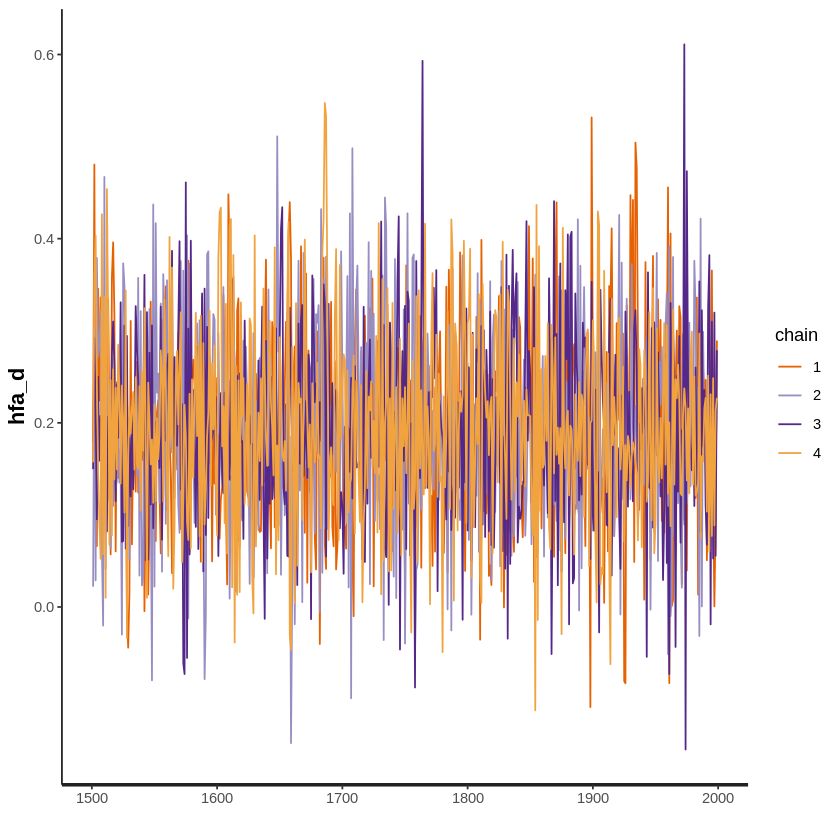

In [11]:
traceplot(fit, pars=c("hfa_d"))

In [12]:
theme_posterior <- theme(
    axis.line.x = element_line(arrow=arrow(length=unit(0.05, "cm")),
     lineend = "butt"),
    panel.background = element_rect(fill="transparent"),
    panel.border = element_rect(fill="transparent"),
    plot.background = element_rect(fill = "transparent"),
  #panel.spacing.y = unit(1,"lines"),
    plot.margin = unit(c(1,1,1,1), "cm"),
  #
    axis.title.y = element_blank(), 
    axis.text.y = element_text(color = "grey20",
      size = 8, angle = 0, hjust = 1, vjust = 0, face = "plain"),
    xis.text.x = element_text(color="grey20",
      hjust = 1, vjust=1, size=8, angle = 50, face = "plain"),
    axis.ticks.y = element_blank()
)

ci_level: 0.9 (90% intervals)

outer_level: 0.95 (95% intervals)



ERROR: Error in eval(expr, envir, enclos): object 'theme_Posterior' not found


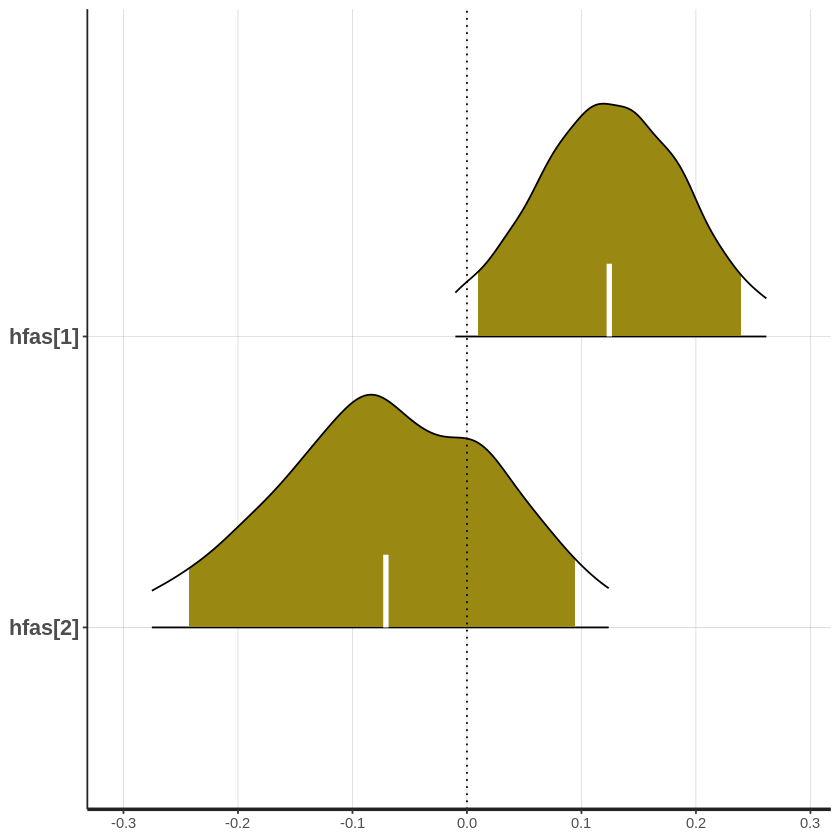

In [13]:
plot(fit,
     pars = names(fit)[c(1,2)],
     show_density = TRUE,
     fill_color = "#998811",
     est_color = "#ffffff",
     ci_level = 0.9, outer_level=0.95) +
     geom_vline(xintercept = 0, linetype = 3, size = 0.5)
     + theme_Posterior